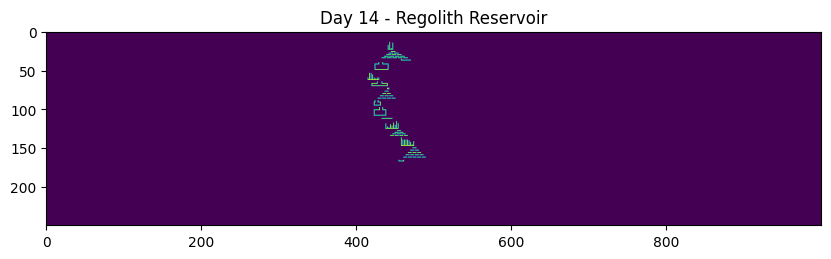

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

day = 14

# os.chdir(f'C:/Users/a652990/VSCode/AOC/AoC_2022/Diederick/Day {day}/')

small = False

if small:
    with open('input14_small.txt') as f:
        data = f.read().splitlines()
        cave = np.zeros((15,100))
        offset = 450
else: 
    with open('input14.txt') as f:
        data = f.read().splitlines()
        cave = np.zeros((250,1000))
        offset = 55
    

stones = set()

abyss = 0

for scan in data:
    points = [list(map(int, x.split(','))) for x in scan.split(" -> ")]
    for i in range(len(points)-1):
        for col in range(min(points[i][0],points[i+1][0]),
                        max(points[i][0],points[i+1][0])+1):
            for row in range(min(points[i][1],points[i+1][1]),
                            max(points[i][1],points[i+1][1])+1):
                stones.add((col,row))
                cave[row,col-offset] = 1
                abyss = max(row,abyss)

fig, ax = plt.subplots(figsize=(10,10))
im = plt.imshow(cave)
plt.title('Day 14 - Regolith Reservoir')
plt.show()




Answer 1: 961
Answer 2: 26375


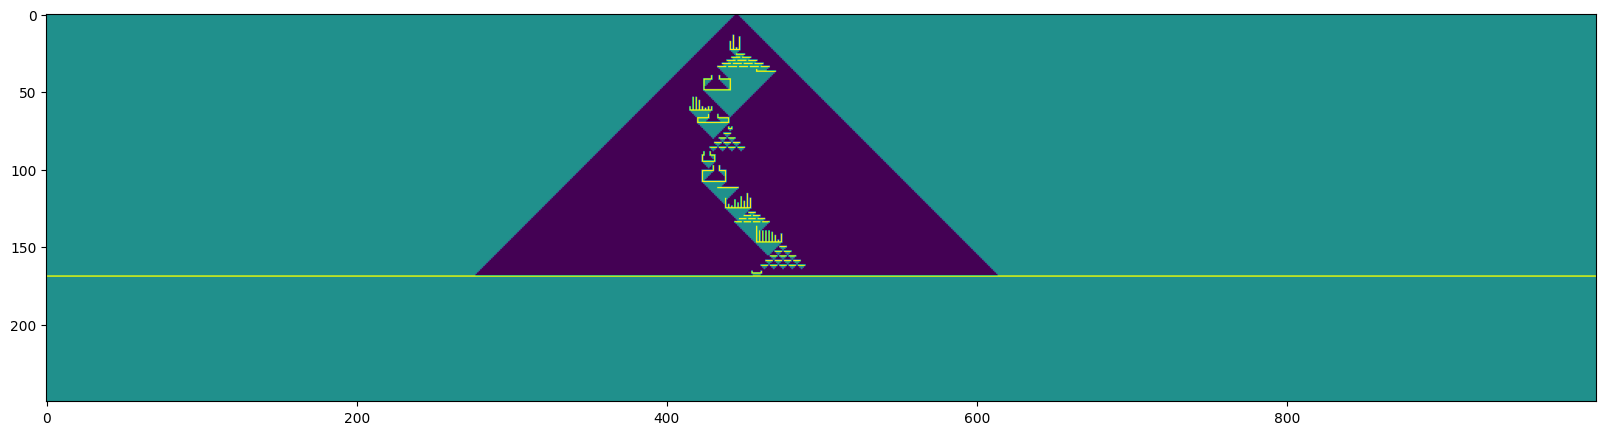

In [2]:
start = [0,500]
sand_resting = 0

stop = False
solved_1 = False
while True:

    still = False
    coord_col = start[1]
    coord_row = start[0]

    if cave[0][500-offset] == -1:                
        print(f'Answer 2: {sand_resting}')
        break

    # plt.subplots(figsize=(20,20))
    # plt.imshow(cave)
    # plt.show()

    while not still:

        if coord_row == abyss and not solved_1:
                print(f'Answer 1: {sand_resting}')
                solved_1 = True

        if (cave[coord_row+1][coord_col-offset] == 0) and (coord_row+1==(abyss+1)): 
            sand_resting +=1
            cave[coord_row+1][coord_col-offset] = -1
            still = True
            continue  

        if (cave[coord_row+1][coord_col-offset] == 0) and (coord_row+1<(abyss+1)):  #keep moving
            coord_row +=1
        
        else:
            if (cave[coord_row+1][coord_col-offset] == 0) and (coord_row+1 >= (abyss+1)):
                 cave[coord_row+1][coord_col-offset] = -1 
            elif cave[coord_row+1][coord_col-offset-1] == 0 and (coord_row+1 < (abyss+1)):   #move left down
                coord_row +=1
                coord_col -=1
            elif cave[coord_row+1][coord_col-offset-1] == 0 and (coord_row+1 >= (abyss+1)):   #move left down if bottom reached
                sand_resting +=1
                cave[coord_row+1][coord_col-offset-1] = -1
                still = True
            elif cave[coord_row+1][coord_col-offset+1] == 0 and (coord_row+1 < (abyss+1)): #move right down
                coord_row +=1
                coord_col +=1
            elif cave[coord_row+1][coord_col-offset+1] == 0 and (coord_row+1 >= (abyss+1)): #move right down if bottom reached
                sand_resting +=1
                cave[coord_row+1][coord_col-offset+1] = -1
                still = True
            else:
                cave[coord_row][coord_col-offset] = -1 #lay still
                sand_resting +=1
                still = True
             
cave[abyss+2,:] = 1
plt.subplots(figsize=(20,20))
plt.imshow(cave)
plt.show()
            
               

